In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


In [8]:
pip install scikit-learn

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("gold_monthly_csv.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [13]:
df = pd.read_csv("gold_monthly_csv.csv")
df.tail()

,Date,Price
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032
846,2020-07,1840.807


In [15]:
df.shape

(847, 2)

In [22]:
print(f"Date range of prices available from - {df.loc[0, 'Date']} to {df.loc[len(df)-1, 'Date']}")


Date range of prices available from - 1950-01 to 2020-07


In [24]:
date = pd.date_range(start='1/1/1950', end='8/1/2020', freq='M')

# Display the date range
print(date)

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')


In [26]:
df['month'] = date
df.drop('Date', axis=1, inplace=True)
df = df.set_index('month')iol


,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


Text(0, 0.5, 'price')

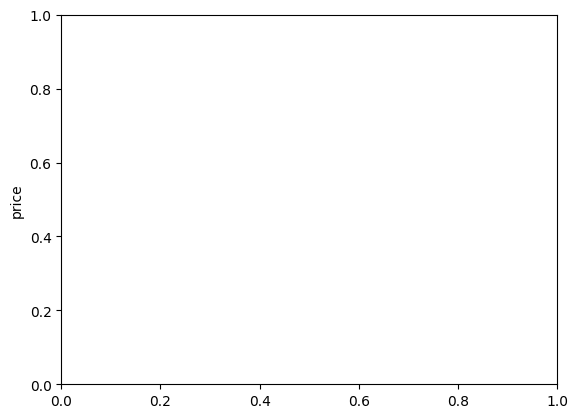

In [29]:
# Change the line with the error
plt.ylabel('price')

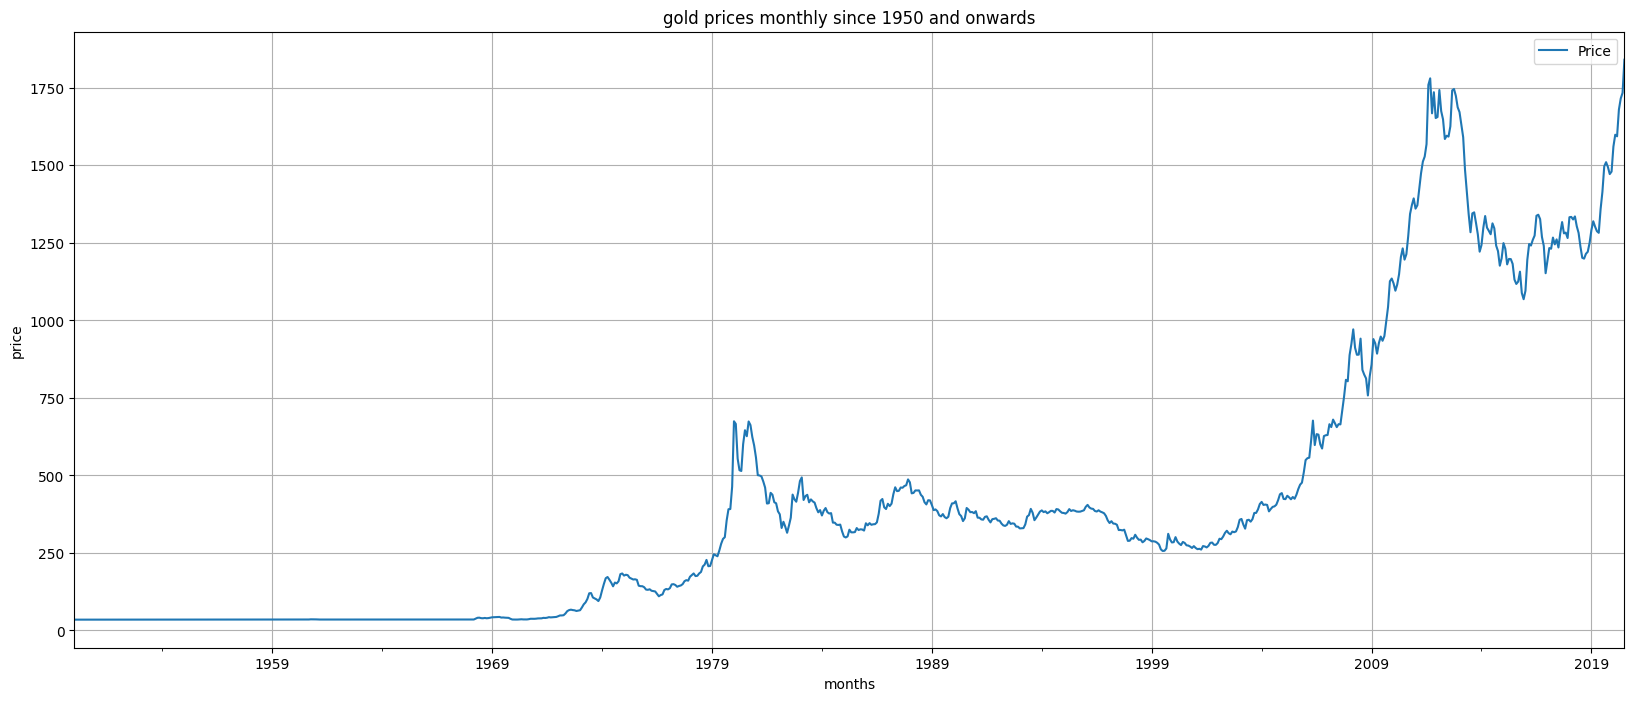

In [33]:
df.plot(figsize=(20,8))
plt.title("gold prices monthly since 1950 and onwards")
plt.xlabel("months")
plt.ylabel('price')
plt.grid();
# Change the line with the error


In [34]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


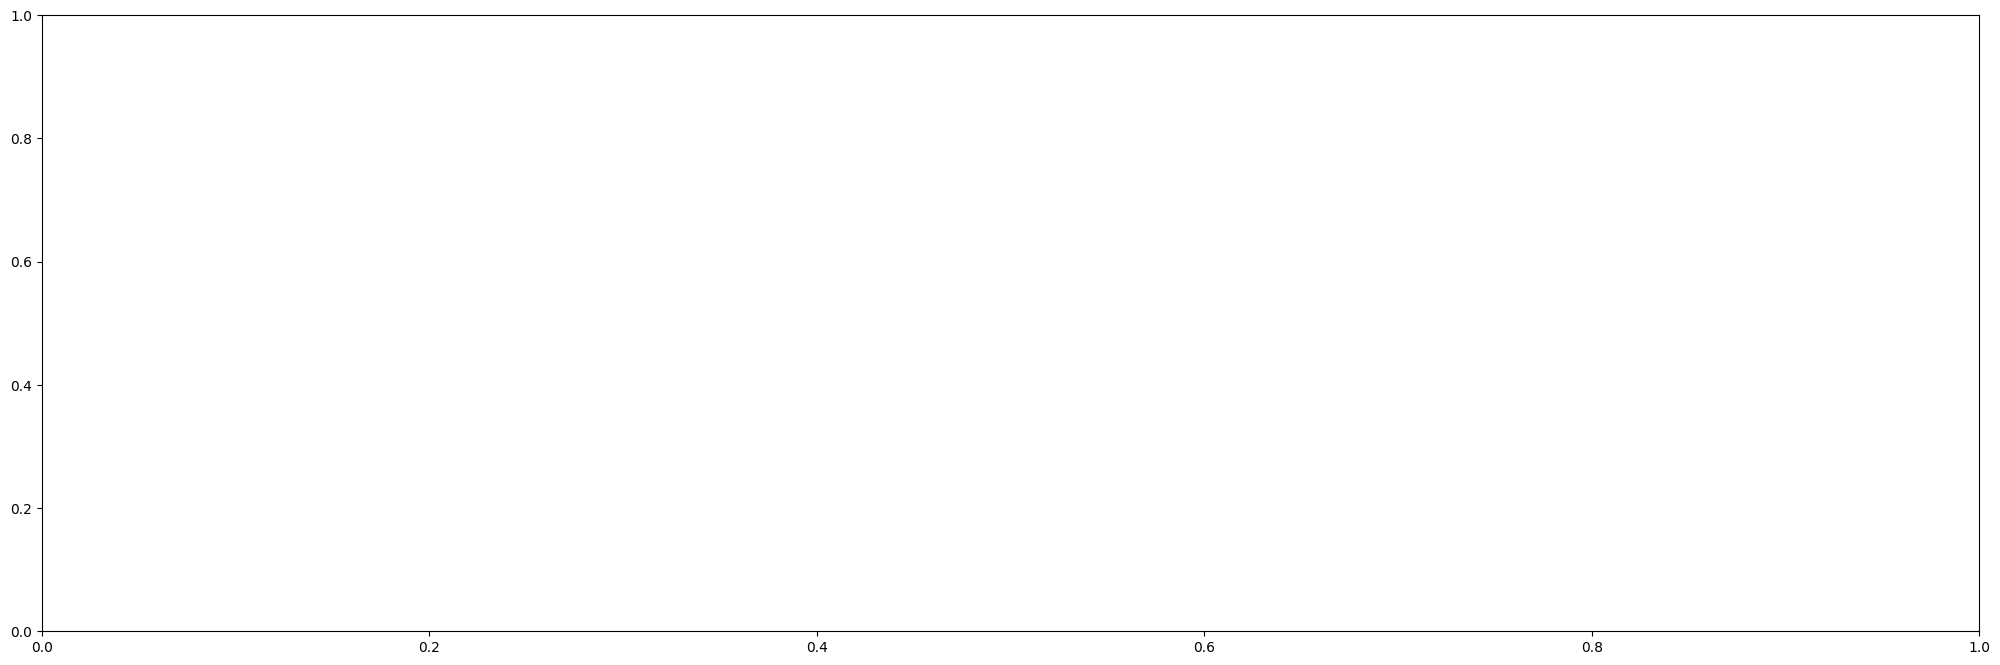

In [35]:
_, ax = plt.subplots(figsize=(25,8))

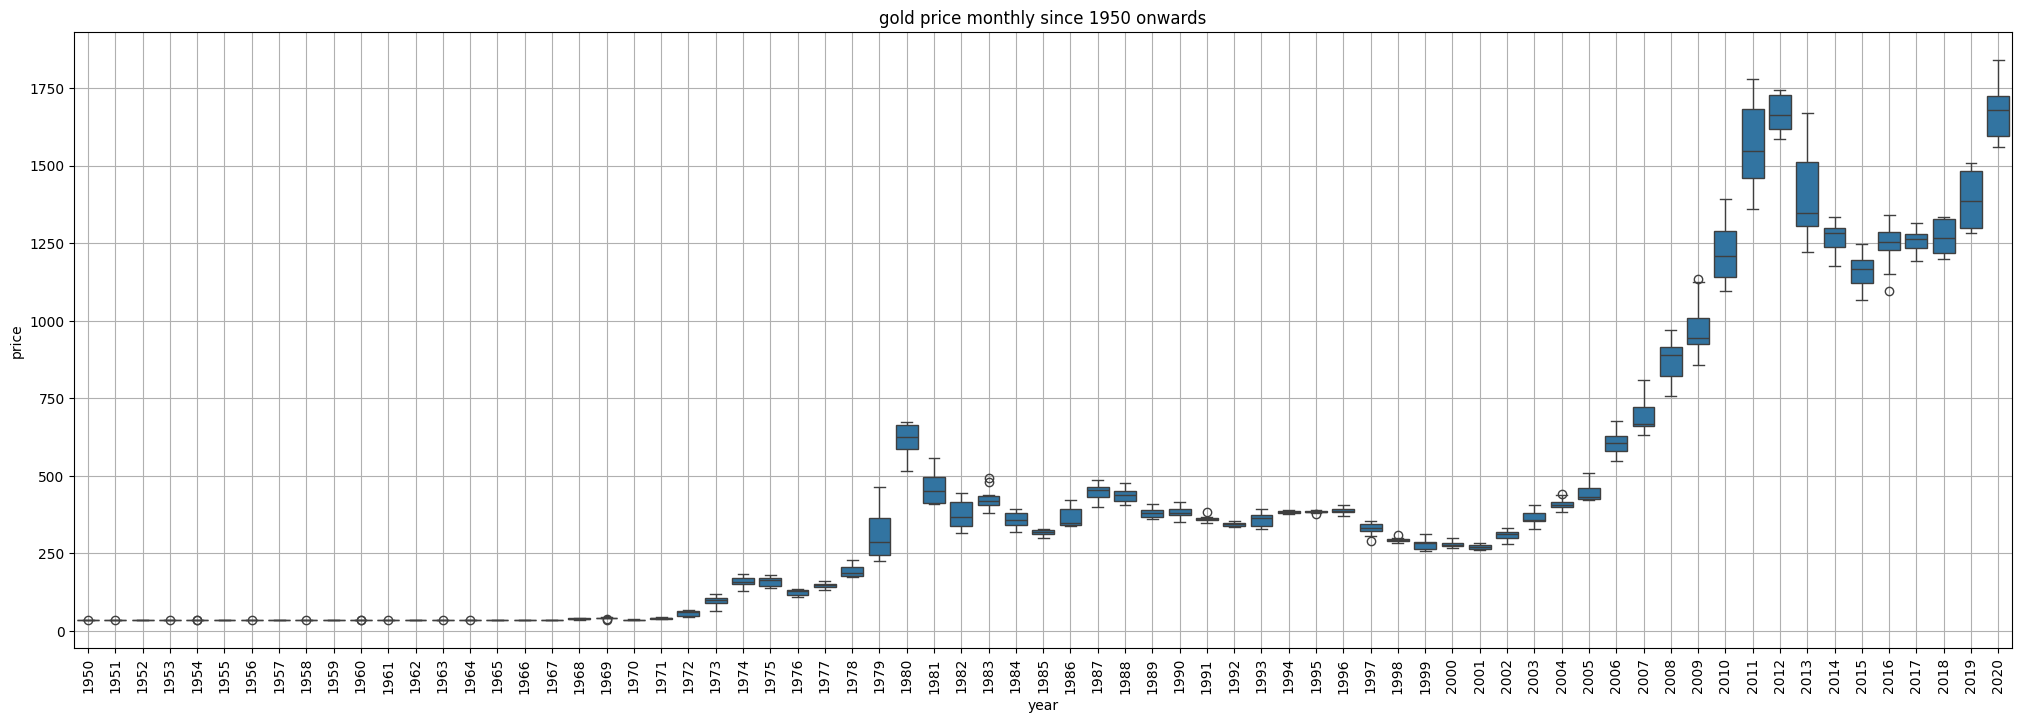

In [37]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year, y = df.values[:,0], ax=ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.grid()

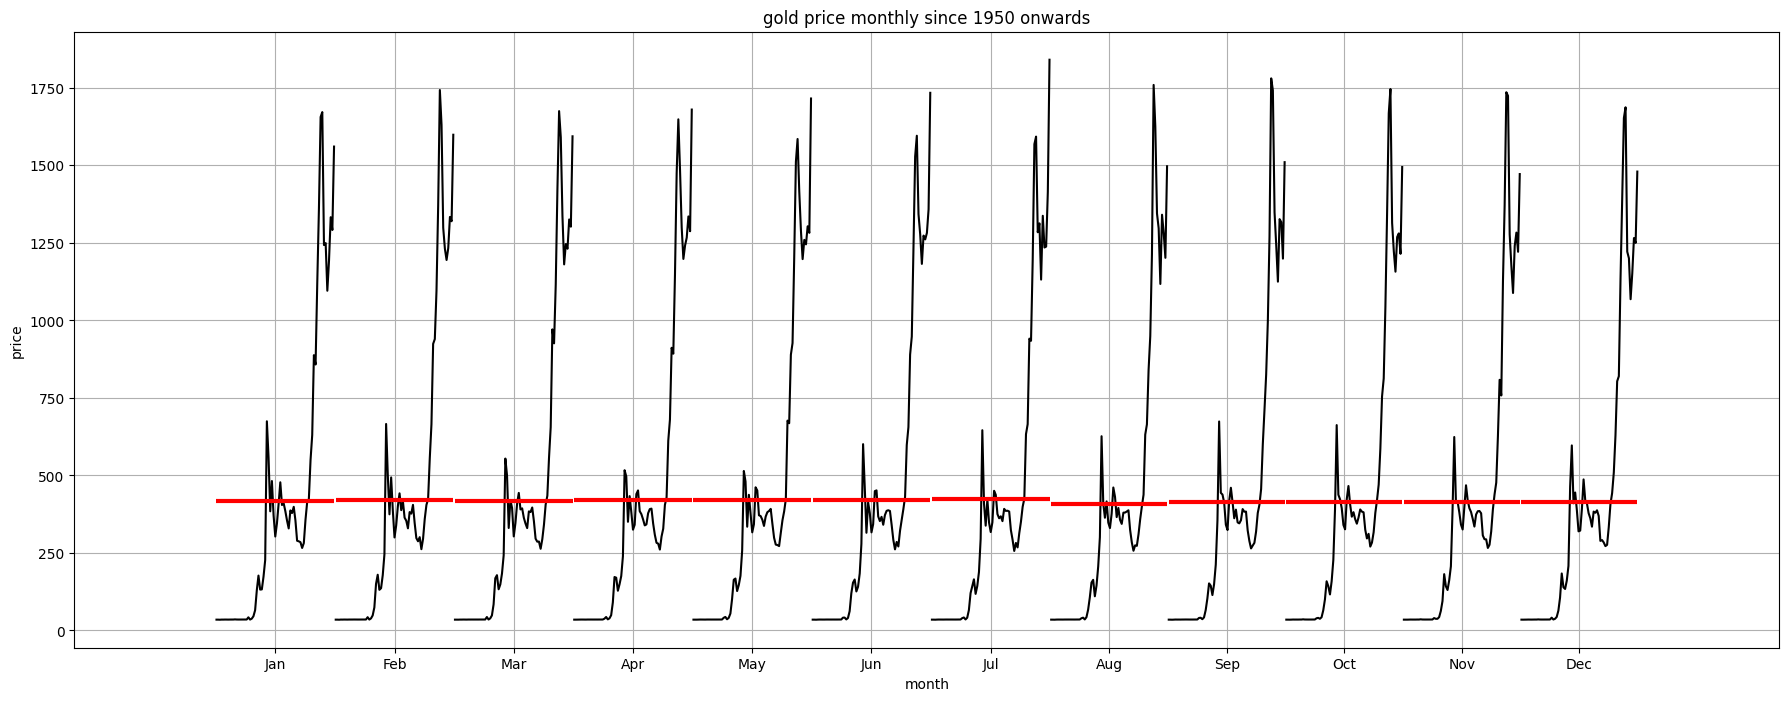

In [38]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))
month_plot(df, ylabel = ' gold price', ax = ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.grid();



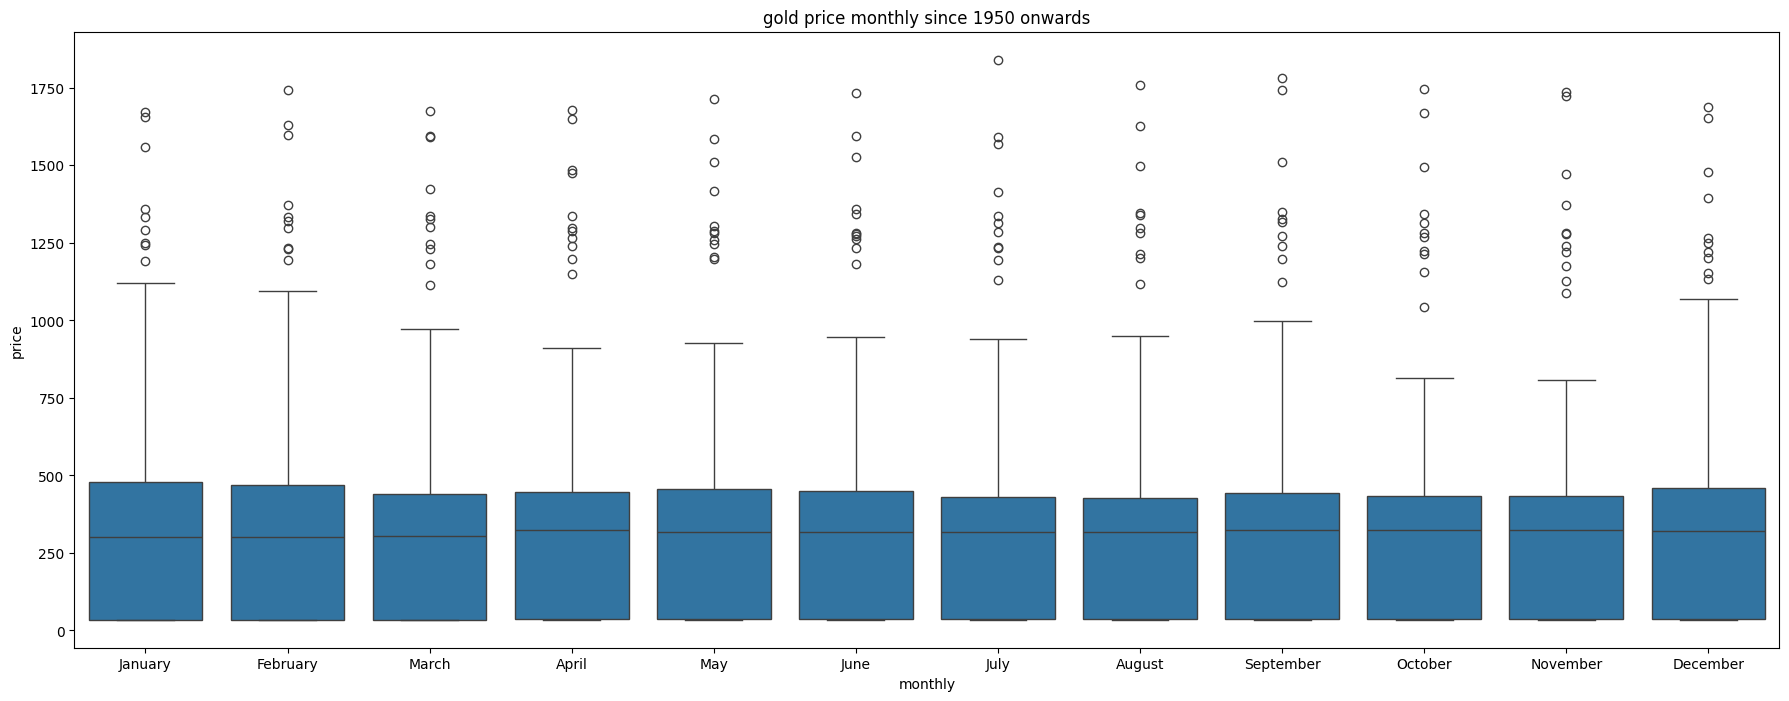

In [41]:
_, ax = plt.subplots(figsize=(22, 8))
sns.boxplot(x = df.index.month_name(), y = df.values[:, 0], ax = ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel("monthly")
plt.ylabel('price')
plt.show();

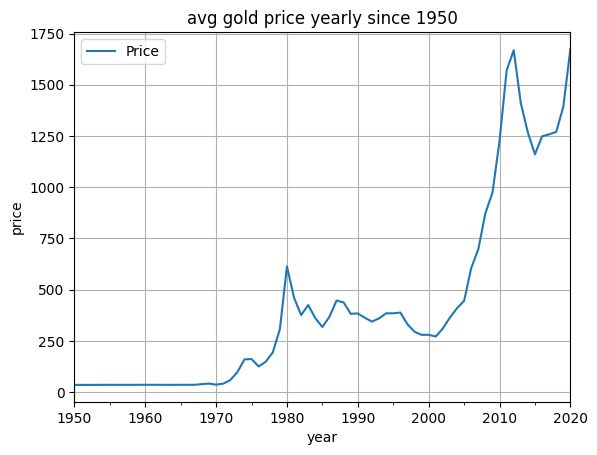

In [42]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title("avg gold price yearly since 1950")
plt.xlabel('year')
plt.ylabel('price')
plt.grid();


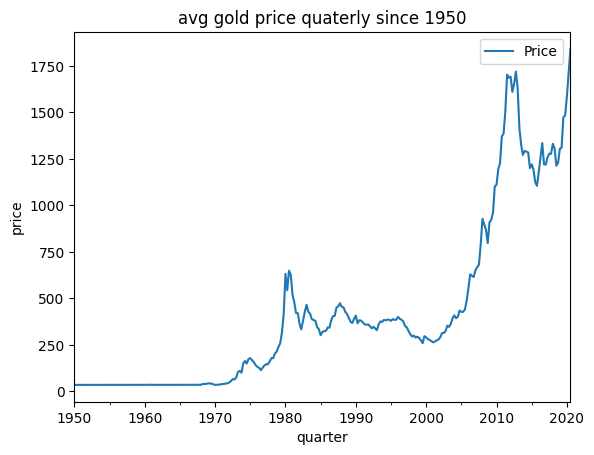

In [44]:
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot();
plt.title("avg gold price quaterly since 1950")
plt.xlabel('quarter')
plt.ylabel('price')
plt.show();

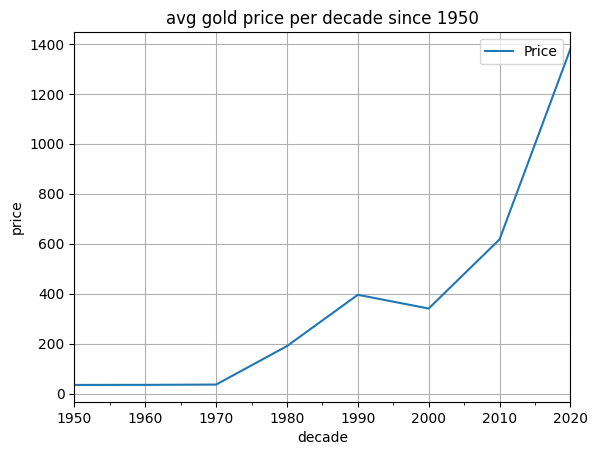

In [45]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot();
plt.title('avg gold price per decade since 1950')
plt.xlabel('decade')
plt.ylabel('price')
plt.grid();

In [46]:
import pandas as pd

# Assuming df has a DateTime index and a 'Price' column

# Group by year, calculate the mean of 'Price', and rename the column to 'Mean'
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price': 'Mean'})

# Group by year, calculate the standard deviation of 'Price', and rename the column to 'Std'
df_2 = df.groupby(df.index.year).std().rename(columns={'Price': 'Std'})

# Merge the mean and standard deviation DataFrames on their indices (years)
df_1 = df_1.merge(df_2, left_index=True, right_index=True)

# Calculate the Coefficient of Variation (Covariance as a percentage)
df_1['Cov_pct'] = ((df_1['Std'] / df_1['Mean']) * 100).round(2)

# Display the first few rows of the resulting DataFrame
df_1.head()


,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


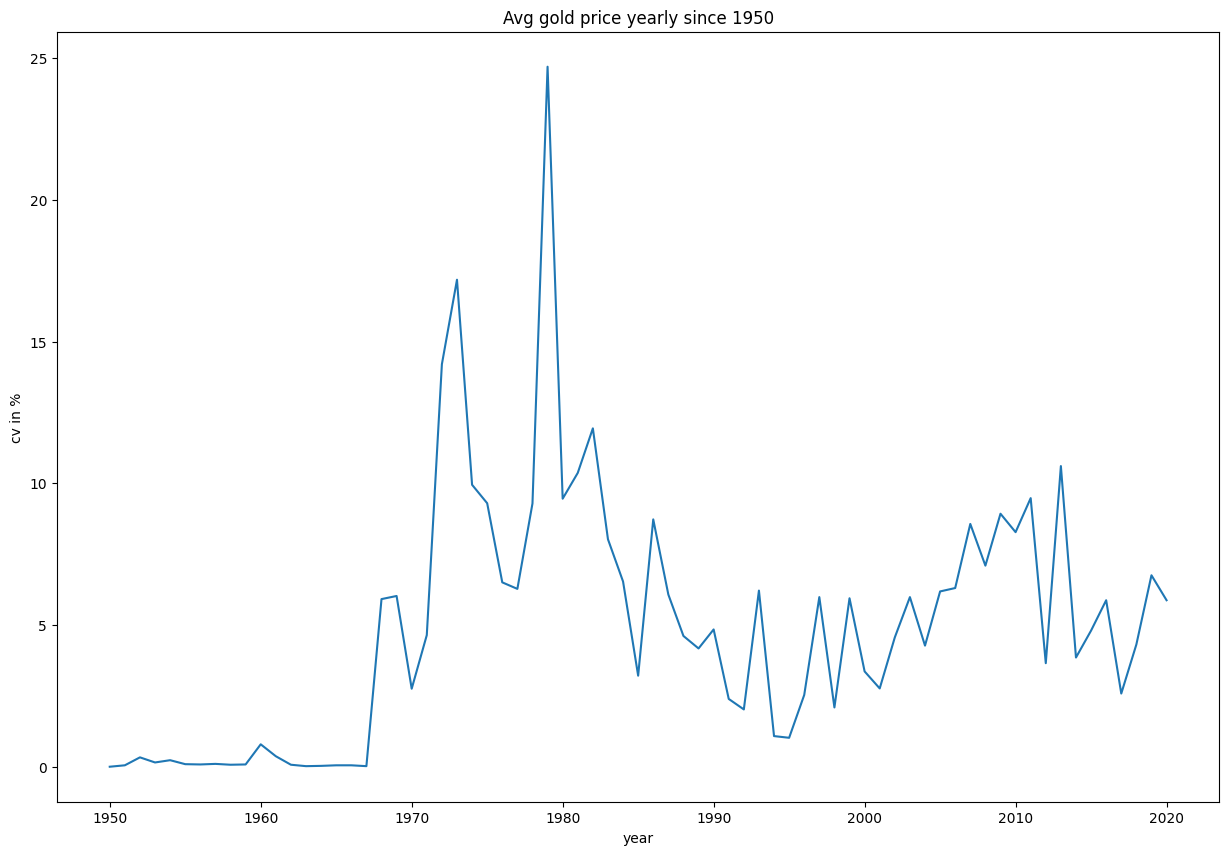

In [49]:
fig, ax= plt.subplots(figsize= (15,10))
df_1['Cov_pct'].plot();
plt.title("Avg gold price yearly since 1950")
plt.xlabel('year')
plt.ylabel('cv in %')
plt.show()

In [50]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [51]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


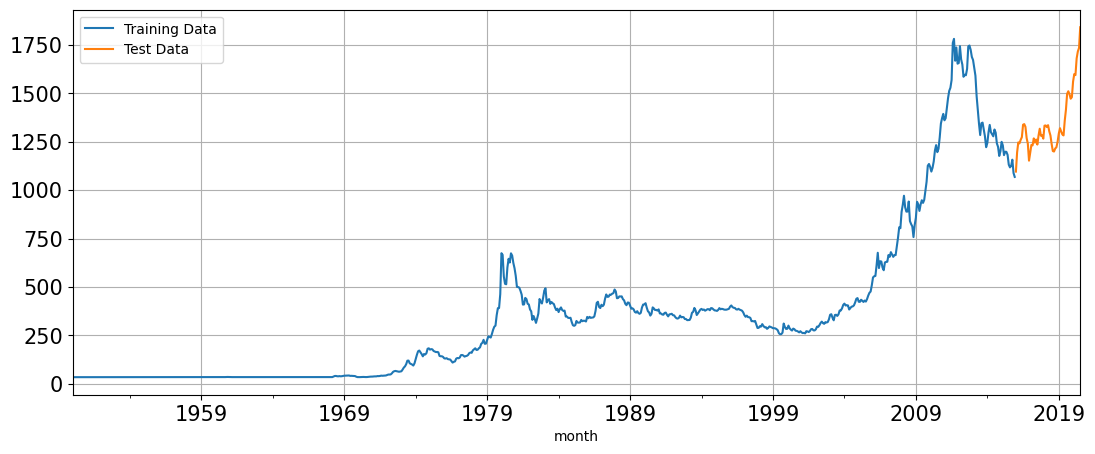

In [52]:
train["Price"].plot(figsize=(13,5),fontsize = 15)
test["Price"].plot(figsize=(13,5), fontsize = 15)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [53]:
"""model formation"""


'model formation'

In [54]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [55]:
LR_train = train.copy()
LR_test = test.copy()

In [57]:
LR_train['time']= train_time
LR_test['time']= test_time

In [60]:
lr = LinearRegression()
lr.fit(LR_train[['time']],LR_train["Price"].values)

LinearRegression()

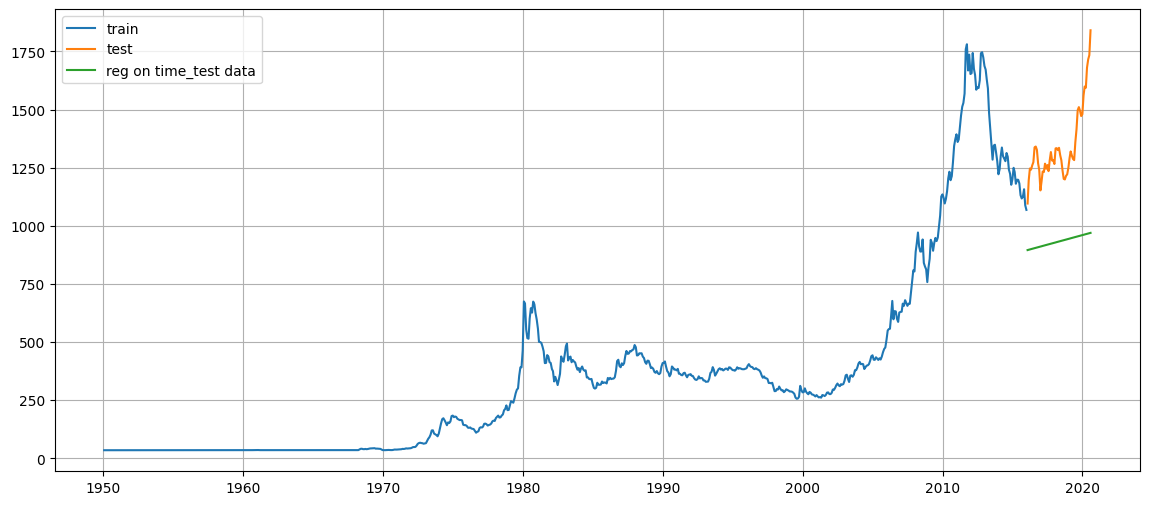

In [66]:
test_predictions_model1 = lr.predict(LR_test[["time"]])
LR_test['forecast'] = test_predictions_model1

plt.figure(figsize = (14, 6))
plt.plot(train['Price'],label = 'train')
plt.plot(test["Price"],label = 'test')
plt.plot(LR_test['forecast'], label = 'reg on time_test data')
plt.legend(loc = 'best')
plt.grid();


In [72]:
def mape(actual, pred):
  return round((np.mean(abs(actual -pred)/ actual))*100,2)

In [73]:
mape_model1_test = mape(test['Price'].values,test_predictions_model1)
print("MAPE is %3.3f"%(mape_model1_test),"%")

MAPE is 29.760 %


In [ ]:
"""mape is a measure of prediction of accuracy of forecasting method in statistical model"""

In [76]:
results = pd.DataFrame({'Test Mape (%)': [mape_model1_test]} , index=["RegressionOnTime"])
results

,Test Mape (%)
RegressionOnTime,29.76


In [77]:
Naive_train = train.copy()
Naive_test = test.copy()

In [78]:
Naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

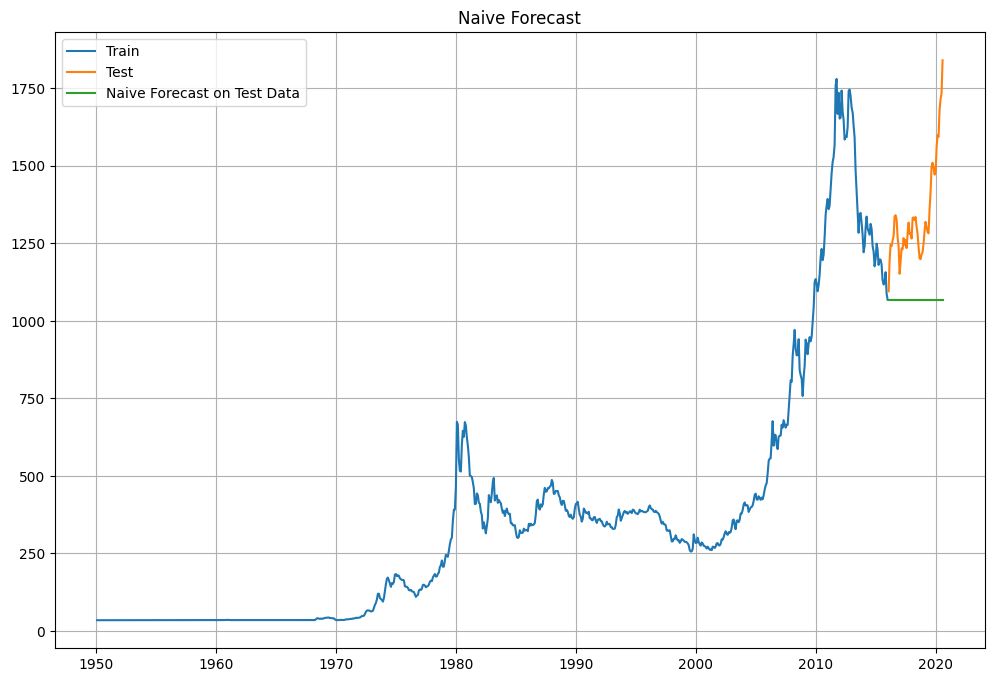

In [79]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'], label = 'Train')
plt.plot(test['Price'],label='Test')
plt.plot(Naive_test['naive'], label = 'Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [80]:
mape_model2_test = mape(test['Price'].values,Naive_test['naive'].values)
print("For Naive forecast on the Test Data, MAPE is %3.3f" %(mape_model2_test),"%")


For Naive forecast on the Test Data, MAPE is 19.380 %


In [81]:
resultsDf_2 = pd.DataFrame({'test MAPE (%)': [mape_model2_test]},index=['NaiveModel'])
results = pd.concat([results, resultsDf_2])
results

,Test Mape (%),test MAPE (%)
RegressionOnTime,29.76,NaN
NaiveModel,NaN,19.38


In [84]:
final_model = ExponentialSmoothing(df,trend = 'additive',
                                        seasonal = 'additive').fit(smoothing_level = 0.4,
                                                                   smoothing_trend = 0.3,
                                                                   smoothing_seasonal = 0.6)

In [92]:
MAPE_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE:", MAPE_final_model)


MAPE: 17.24


In [94]:
predictions = final_model.forecast(steps=len(test))

In [100]:
pred_df = pd.DataFrame({'lower_CI':predictions - 1.96*np.std(final_model.resid,ddof=1),
                        'prediction':predictions,
                        'upper_CI':predictions+ 1.96*np.std(final_model.resid,ddof = 1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235


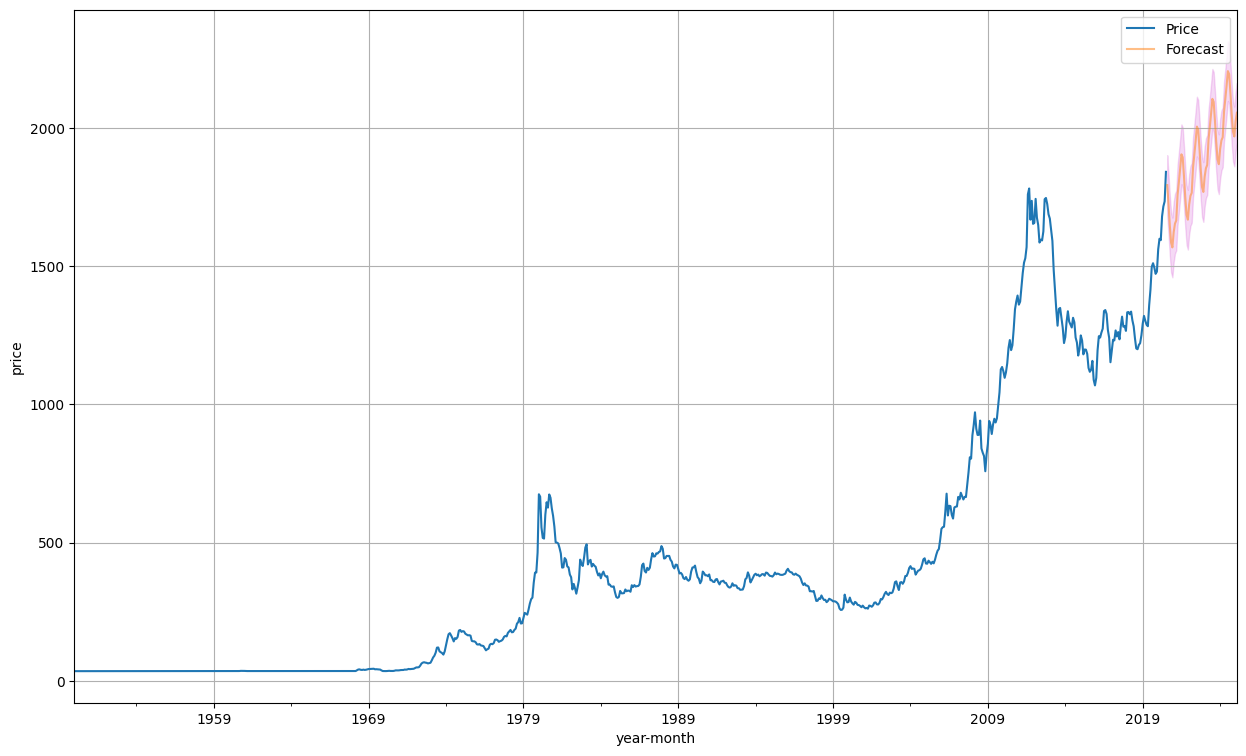

In [104]:
import matplotlib.pyplot as plt

# Plotting
axis = df.plot(label='Actual', figsize=(15, 9))  # Corrected figsize syntax
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='m', alpha=0.15)
axis.set_ylabel('price')  # Corrected ylabel to 'price'
axis.set_xlabel('year-month')  # Corrected xlabel to 'year-month'
plt.legend(loc='best')
plt.grid()
plt.show()
